In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt
import os

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
#데이터 로드
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


# 클래스 이름 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 이미지 픽셀 값을 0과 1사이로 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

# 0: 티셔츠/탑 (T-shirt/top) 1: 바지 (Trouser) 2: 풀오버 (Pullover) 3: 드레스 (Dress)
# #4: 코트 (Coat) 5: 샌들 (Sandal) 6: 셔츠 (Shirt) 7: 스니커즈 (Sneaker) 8: 가방 (Bag) 9: 앵클 부츠 (Ankle boot)


In [4]:
# # 레이블을 One-Hot Encoding (숫자 0~9를 벡터로 변환)
# # One-Hot Encoding : 범주형 데이터를 수치형 데이터로 변환하는 방법
if len(train_images.shape) == 1:  # shape이 (n,)인지 확인
     train_images = tf.keras.utils.to_categorical(train_images, 10)  # to_categorical(원핫인코딩 대상, 클래스 갯수)
if len(train_labels.shape) == 1:  # shape이 (n,)인지 확인
     train_labels = tf.keras.utils.to_categorical(train_labels, 10)
if len(test_images.shape) == 1:  # shape이 (n,)인지 확인
     test_images = tf.keras.utils.to_categorical(test_images, 10)  # to_categorical(원핫인코딩 대상, 클래스 갯수)
if len(test_labels.shape) == 1:  # shape이 (n,)인지 확인
     test_labels = tf.keras.utils.to_categorical(test_labels, 10)


In [5]:
#합성곱 계층
model = models.Sequential()
#첫번째 합성곱: 이미지에서 특징 추출
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
#풀링: 특징 맵의 크기를 줄여 계산줄이고 과적합 방지     
model.add(layers.MaxPooling2D((2, 2)))
# 두 번째 합성곱 계층: 필터 수 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


c:\ai_files\dl_Study\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
#Flatten(평탄화),Dense(연결층)
model.add(layers.Flatten())
#출력층: 뉴런 수 64, 활성화 함수 ReLU
model.add(layers.Dense(64,activation='relu'))
#softmax 출력층
model.add(layers.Dense(10, activation='softmax'))


In [7]:
#모델 요약 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#3. 모델 컴파일: 손실 함수, 옵티마이저, 평가 지표를 설정합니다.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# 4. 모델 학습
history = model.fit(train_images, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9149 - loss: 0.2328 - val_accuracy: 0.8950 - val_loss: 0.2869
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9197 - loss: 0.2166 - val_accuracy: 0.9013 - val_loss: 0.2628
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9299 - loss: 0.1920 - val_accuracy: 0.9048 - val_loss: 0.2626
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9330 - loss: 0.1829 - val_accuracy: 0.9107 - val_loss: 0.2499
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9393 - loss: 0.1649 - val_accuracy: 0.9054 - val_loss: 0.2629
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9432 - loss: 0.1546 - val_accuracy: 0.8974 - val_loss: 0.2922
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9483 - loss: 0.1403 - val_accuracy: 0.9047 - val_loss: 0.2760
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9536 - loss: 0.1269 - val_accu

In [ ]:
# 6. 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8990 - loss: 0.2915
테스트 정확도: 0.8972


In [ ]:
# 결과 확인
import numpy as np

#테스트 샘플
sample_image = test_images[0]
sample_label = np.argmax(test_labels[0])

#모델 예측
predicted_label = np.argmax(model.predict(sample_image.reshape(1,28,28,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


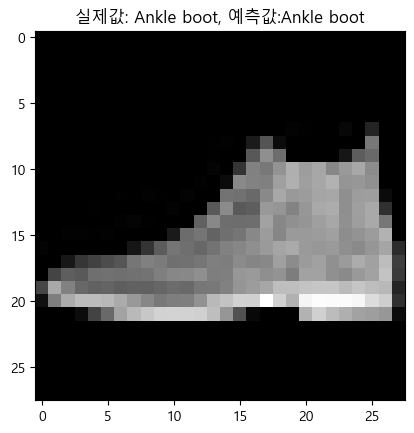

In [ ]:
#결과 출력
plt.imshow(sample_image.reshape(28,28), cmap='gray')

# 실제값과 예측값을 클래스 이름으로 변환
actual_class_name = class_names[sample_label]
predicted_class_name = class_names[predicted_label]

plt.title(f"실제값: {actual_class_name}, 예측값:{predicted_class_name}")
plt.show()